In [1]:
#pip install seaborn

In [2]:
#import tensorflow as tf

In [3]:
#pip install scikit-learn

In [4]:
#pip install tensorflow_datasets

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import scipy.sparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime
import tensorflow_datasets as tfds
import IPython
import IPython.display

Download the data from the github
- Set the start and end date for the data
- Set the data directory where the downloaded datasets are stored

In [6]:
#def download_economic_data():
  #  dl_manager = tfds.download.DownloadManager(download_dir = '/tmp/economic_recovery', 
   #                                            extract_dir='/tmp/economic_recovery')
    #path = dl_manager.download_and_extract(
     #   'https://github.com/OpportunityInsights/EconomicTracker/tree/main.zip'
    #)
    #data_dir = path + '/EconomicTracker-main/data/'
    #return data_dir


In [7]:

start_date = '2020-03-07'
end_date = '2021-03-06'
#data_dir = download_economic_data()
data_dir = 'C:/Users/user/Desktop/New folder/Machine Learning Project/EconomicTracker-main/data/'
state = 26
IPython.display.clear_output()
print('data dir:',data_dir)

data dir: C:/Users/user/Desktop/New folder/Machine Learning Project/EconomicTracker-main/data/


The function below does the following:

- Read the csv file into Pandas dataframe
- If state is passed, then filter the records for the state (will be using data for Michigan only)
- The data contains three columns for the date. year, month, and day. So, concatenates them and convert it to datetime type
- If a column list is passed, then select only those columns from the dataframe, otherwise use the entire column list available
- If a column contains '.', it will be converted to '0.0'
- The datatype of the columns are converted to float
- Interpolate missing data if any
- Select only the date range passed and return to the caller

In [8]:
def prepare_data(csv_file, start_date=start_date, end_date=end_date, day=None, 
                 state=state, selected_cols=[], interpolate=False):
    df = pd.read_csv(data_dir + csv_file)
    if (state is not None):
        df = df[df['statefips'] == state] 
        
    if (day is None):
        day = 'day'
        
    df['date'] = df[['year', 'month', day]].apply(lambda s : datetime(*s),axis = 1)
    df.drop(('year'), axis=1, inplace=True)
    df.drop(('month'), axis=1, inplace=True)
    df.drop((day), axis=1, inplace=True)
    df.index = pd.DatetimeIndex(df['date'])
    df.sort_index()

    if (len(selected_cols) > 0):
        df = df[selected_cols]
    if (interpolate):
        df = df.reindex(pd.date_range(start_date, end_date), fill_value="NaN")
    df.drop(('date'), axis=1, inplace=True, errors='ignore')
    
    str_cols = df.select_dtypes(include=['object']).columns
    df[str_cols] = df[str_cols].replace({'.':'0.0'})
    
    df = df.astype(float)
    df = df.interpolate(method='linear', axis=0).ffill().bfill()
    df = df[df.index >= start_date] 
    df = df[df.index <= end_date] 
    return df

In [9]:
#03/13/2021

selected_cols=['initclaims_count_regular', 'contclaims_count_regular', 'initclaims_count_combined','contclaims_count_combined']
ui_claims = prepare_data('UI Claims - State - Weekly.csv', day='day_endofweek', selected_cols=selected_cols, interpolate=True)
ui_claims.tail()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined
2021-03-02,11452.428571,169619.714286,15360.0,301818.285714
2021-03-03,11437.571429,166754.285714,15299.0,226363.714286
2021-03-04,11422.714286,163888.857143,15238.0,150909.142857
2021-03-05,11407.857143,161023.428571,15177.0,75454.571429
2021-03-06,11393.000000,158158.000000,15116.0,0.000000


In [10]:
#03/09/2021

selected_cols=['bg_posts_ss60', 'bg_posts_ss70']
burning_glass = prepare_data('Burning Glass - State - Weekly.csv', start_date='2020-03-06', selected_cols=selected_cols, day='day_endofweek', interpolate=True)
burning_glass.head(10)

,bg_posts_ss60,bg_posts_ss70
2020-03-06,0.082200,0.0960
2020-03-07,0.072643,0.0837
2020-03-08,0.063086,0.0714
2020-03-09,0.053529,0.0591
2020-03-10,0.043971,0.0468
2020-03-11,0.034414,0.0345
2020-03-12,0.024857,0.0222
2020-03-13,0.015300,0.0099
2020-03-14,-0.006600,-0.0228
2020-03-15,-0.028500,-0.0555


In [11]:
#03/12/2021

selected_cols=['case_count', 'death_count']
covid_mi_daily = prepare_data('COVID - State - Daily.csv', selected_cols=selected_cols)
covid_mi_daily.head()

,case_count,death_count
date,,
2020-03-07,0.0,0.0
2020-03-08,0.0,0.0
2020-03-09,0.0,0.0
2020-03-10,0.0,0.0
2020-03-11,1.0,0.0


In [13]:
#03/12/2021

selected_cols=['revenue_ss60', 'revenue_ss70']
revenue_daily = prepare_data('Womply - State - Daily.csv', selected_cols=selected_cols)
revenue_daily.head()

,revenue_ss60,revenue_ss70
date,,
2020-03-07,0.0546,-0.0413
2020-03-08,0.1010,-0.0357
2020-03-09,0.0707,-0.0370
2020-03-10,0.0271,-0.0430
2020-03-11,0.0279,-0.0489


In [14]:
#03/12/2021

selected_cols=['spend_acf', 'spend_hcs']
spend_daily = prepare_data('Affinity - State - Daily.csv', selected_cols=selected_cols)
spend_daily.head()

,spend_acf,spend_hcs
date,,
2020-03-07,-0.03040,-0.02080
2020-03-08,-0.02830,0.00586
2020-03-09,-0.02430,-0.04010
2020-03-10,-0.00913,0.18600
2020-03-11,-0.01250,0.15600


In [23]:
#04/01/2021

selected_cols=['emp_combined', 'emp_combined_ss40', 'emp_combined_ss60', 'emp_combined_ss70']
employment_daily = prepare_data('Employment Combined - State - Daily.csv', selected_cols=selected_cols)
employment_daily.head()

,emp_combined,emp_combined_ss40,emp_combined_ss60,emp_combined_ss70
date,,,,
2020-03-07,0.00409,-0.00321,0.000398,0.00774
2020-03-08,0.00388,-0.00346,0.000601,0.00620
2020-03-09,0.00361,-0.00375,0.000790,0.00430
2020-03-10,0.00315,-0.00418,0.000866,0.00174
2020-03-11,0.00245,-0.00476,0.000767,-0.00179


In [15]:
#04/01/2021

#selected_cols=['engagement', 'badges', 'break_engagement', 'break_badges']
#zearn_weekly = prepare_data('Zearn - State - Weekly.csv', day = 'day_endofweek', selected_cols=selected_cols)
#zearn_weekly.tail()

In [16]:
#04/01/2021

selected_cols=['gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations', 'gps_workplaces', 'gps_away_from_home']
mobility = prepare_data('Google Mobility - State - Daily.csv', selected_cols=selected_cols)
mobility.head(10)

,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
date,,,,,
2020-03-07,0.10700,0.0471,0.10700,0.02570,0.01560
2020-03-08,0.10700,0.0486,0.09430,0.02570,0.01560
2020-03-09,0.10300,0.0486,0.09140,0.02570,0.01390
2020-03-10,0.10100,0.0457,0.08710,0.02290,0.01250
2020-03-11,0.09570,0.0586,0.08000,0.02290,0.01090
2020-03-12,0.09140,0.0929,0.07000,0.02000,0.00800
2020-03-13,0.08140,0.1410,0.05570,0.01000,0.00385
2020-03-14,0.04290,0.1490,0.02860,0.00143,-0.01120
2020-03-15,0.00286,0.1470,-0.00286,-0.01140,-0.02570


In [28]:
result = pd.concat([ui_claims, burning_glass, covid_mi_daily, revenue_daily, spend_daily, mobility], axis=1, join='inner')
# nit using employment_daily and zearn_weekly
result.head()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,bg_posts_ss60,bg_posts_ss70,case_count,death_count,revenue_ss60,revenue_ss70,spend_acf,spend_hcs,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_transit_stations,gps_workplaces,gps_away_from_home
2020-03-07,5150.000000,77661.0,5150.000000,77661.0,0.072643,0.0837,0.0,0.0,0.0546,-0.0413,-0.03040,-0.02080,0.1070,0.0471,0.1070,0.0257,0.0156
2020-03-08,5176.857143,77389.0,5176.857143,77389.0,0.063086,0.0714,0.0,0.0,0.1010,-0.0357,-0.02830,0.00586,0.1070,0.0486,0.0943,0.0257,0.0156
2020-03-09,5203.714286,77117.0,5203.714286,77117.0,0.053529,0.0591,0.0,0.0,0.0707,-0.0370,-0.02430,-0.04010,0.1030,0.0486,0.0914,0.0257,0.0139
2020-03-10,5230.571429,76845.0,5230.571429,76845.0,0.043971,0.0468,0.0,0.0,0.0271,-0.0430,-0.00913,0.18600,0.1010,0.0457,0.0871,0.0229,0.0125
2020-03-11,5257.428571,76573.0,5257.428571,76573.0,0.034414,0.0345,1.0,0.0,0.0279,-0.0489,-0.01250,0.15600,0.0957,0.0586,0.0800,0.0229,0.0109


In [29]:
result.shape

(365, 17)

In [19]:
result.to_csv(r'C:\Users\user\Desktop\New folder\results.csv')

## Performing and Correlation or Heatmaps on the features columns

<Figure size 1152x864 with 0 Axes>

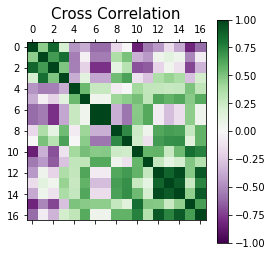

In [20]:
# Correlations among columns
plt.figure(figsize=(16,12))
plt.matshow(result.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Cross Correlation', size=15)
plt.colorbar()
plt.show()

<AxesSubplot:>

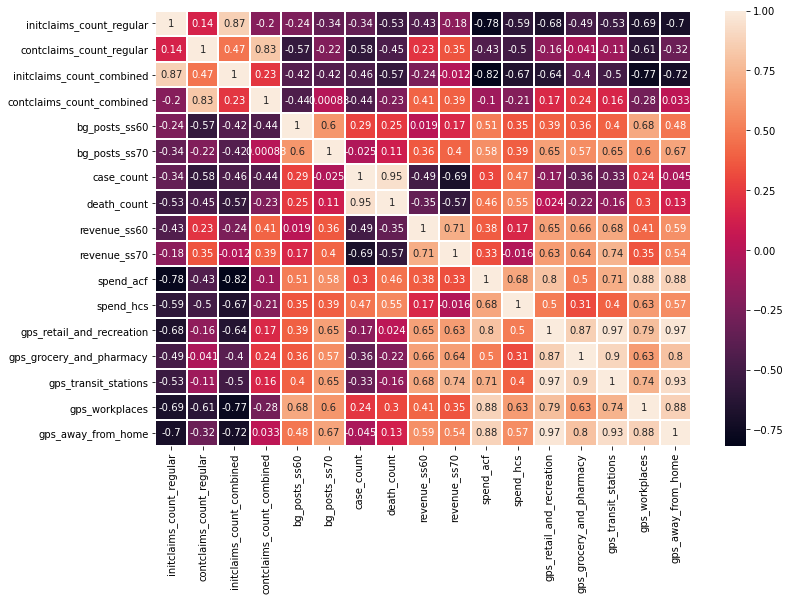

In [30]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(result.corr(), linewidths=1, annot=True)